# CT5143 Machine Learning Assignment 1

### Step 1. Problem Definition:

We are given a training and test set of data, from which we have to classify instances in the test set to a style of beer: ale, larger, or stout

In [1]:
# Import all the necessary modules to be used throughout the notebook
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Data Preparation:

In [2]:
# import the training and test datasets
d1 = pd.read_csv("beer_training.txt",sep='\t', header=None)
d2 = pd.read_csv("beer_test.txt",sep='\t', header=None)
# view raw training dataset
print(d1.head(5))
# view raw test dataset
print(d2.head(5))

           0         1         2    3         4      5          6    7      8  \
0  45.305310  0.459548  1.917273  ale  4.227692  16.67  12.568947  167  11.04   
1  43.889381  0.548977  3.186364  ale  4.289231  16.73  14.974000  128  13.44   
2  41.588496  0.542847  1.568182  ale  4.344615  16.48  11.848789   88  14.04   
3  44.553097  0.480301  1.871818  ale  4.424615  18.59  13.879632  147  12.48   
4  41.013274  0.441860  2.345455  ale  4.264615  16.35  12.186053   74  12.12   

           9  
0  62.178571  
1  63.032857  
2  63.468571  
3  63.531429  
4  63.747143  
           0         1         2    3         4      5          6    7      8  \
0  41.721239  0.503276  2.628182  ale  4.015385  16.73  10.452789   93  13.44   
1  42.429204  0.525512  1.776364  ale  4.092308  16.72  10.999526  103  12.24   
2  45.880531  0.443233  2.628182  ale  4.276923  16.68  13.456368  178  10.92   
3  45.305310  0.471668  1.806364  ale  4.126154  18.84   9.202737  166  10.92   
4  38.977876  0.39

In [3]:
# As per the probelm worksheet the attribute names are as follows and in this order:
# calorific_value, nitrogen, turbidity, style, alcohol, sugars, bitterness, beer_id, colour, degree_of_fermentation
d1.columns =['calorific_value', 'nitrogen', 'turbidity', 'style', 'alcohol', 'sugars', 'bitterness', 'beer_id', \
             'colour', 'degree_of_fermentation']

d2.columns =['calorific_value', 'nitrogen', 'turbidity', 'style', 'alcohol', 'sugars', 'bitterness', 'beer_id', \
             'colour', 'degree_of_fermentation']
print(d1.head(5))
print(d2.head(5))

   calorific_value  nitrogen  turbidity style   alcohol  sugars  bitterness  \
0        45.305310  0.459548   1.917273   ale  4.227692   16.67   12.568947   
1        43.889381  0.548977   3.186364   ale  4.289231   16.73   14.974000   
2        41.588496  0.542847   1.568182   ale  4.344615   16.48   11.848789   
3        44.553097  0.480301   1.871818   ale  4.424615   18.59   13.879632   
4        41.013274  0.441860   2.345455   ale  4.264615   16.35   12.186053   

   beer_id  colour  degree_of_fermentation  
0      167   11.04               62.178571  
1      128   13.44               63.032857  
2       88   14.04               63.468571  
3      147   12.48               63.531429  
4       74   12.12               63.747143  
   calorific_value  nitrogen  turbidity style   alcohol  sugars  bitterness  \
0        41.721239  0.503276   2.628182   ale  4.015385   16.73   10.452789   
1        42.429204  0.525512   1.776364   ale  4.092308   16.72   10.999526   
2        45.880531

The 'style' attribute is the target attribute we are classifying our data instances to.

In [4]:
# for ease of data manipulation I'll move the style column to be the final column in the dataframe
# though this is more for aesthectic reasons.
d1 = d1[['calorific_value', 'nitrogen', 'turbidity', 'alcohol', 'sugars', 'bitterness', 'beer_id', \
             'colour', 'degree_of_fermentation', 'style']]

d2 = d2[['calorific_value', 'nitrogen', 'turbidity', 'alcohol', 'sugars', 'bitterness', 'beer_id', \
             'colour', 'degree_of_fermentation', 'style']]
print(d1.head(5))
print(d2.head(5))

   calorific_value  nitrogen  turbidity   alcohol  sugars  bitterness  \
0        45.305310  0.459548   1.917273  4.227692   16.67   12.568947   
1        43.889381  0.548977   3.186364  4.289231   16.73   14.974000   
2        41.588496  0.542847   1.568182  4.344615   16.48   11.848789   
3        44.553097  0.480301   1.871818  4.424615   18.59   13.879632   
4        41.013274  0.441860   2.345455  4.264615   16.35   12.186053   

   beer_id  colour  degree_of_fermentation style  
0      167   11.04               62.178571   ale  
1      128   13.44               63.032857   ale  
2       88   14.04               63.468571   ale  
3      147   12.48               63.531429   ale  
4       74   12.12               63.747143   ale  
   calorific_value  nitrogen  turbidity   alcohol  sugars  bitterness  \
0        41.721239  0.503276   2.628182  4.015385   16.73   10.452789   
1        42.429204  0.525512   1.776364  4.092308   16.72   10.999526   
2        45.880531  0.443233   2.628

In [5]:
# identify shape and data types of each column for data understanding
print(d1.shape)
print(d1.dtypes)

print(d2.shape)
print(d2.dtypes)

(124, 10)
calorific_value           float64
nitrogen                  float64
turbidity                 float64
alcohol                   float64
sugars                    float64
bitterness                float64
beer_id                     int64
colour                    float64
degree_of_fermentation    float64
style                      object
dtype: object
(30, 10)
calorific_value           float64
nitrogen                  float64
turbidity                 float64
alcohol                   float64
sugars                    float64
bitterness                float64
beer_id                     int64
colour                    float64
degree_of_fermentation    float64
style                      object
dtype: object


### Split the training and test data into attributes and target

In [6]:
X_train = d1.loc[:, d1.columns != 'style']
y_train = d1.loc[:,'style']

X_test = d2.loc[:, d1.columns != 'style']
y_test = d2.loc[:,'style']

### Scale features to reduce bias on classes that are dominant 

In [7]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train)) 
X_test = pd.DataFrame(scaler.fit_transform(X_test))

# add columns names back on to the scaled datasets

X_train.columns = [['calorific_value', 'nitrogen', 'turbidity', 'alcohol', 'sugars', 'bitterness', 'beer_id', \
             'colour', 'degree_of_fermentation']]
X_test.columns = [['calorific_value', 'nitrogen', 'turbidity', 'alcohol', 'sugars', 'bitterness', 'beer_id', \
             'colour', 'degree_of_fermentation']]

### Feature selection

In [8]:
bestfeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Attribute','Score']
print(featureScores.nlargest(10,'Score'))

                   Attribute       Score
1                (nitrogen,)  137.030340
3                 (alcohol,)  104.102627
7                  (colour,)   81.577728
5              (bitterness,)   77.414101
2               (turbidity,)   72.811679
4                  (sugars,)   38.245345
8  (degree_of_fermentation,)    9.112575
0         (calorific_value,)    1.051558
6                 (beer_id,)    0.992585


The output shows there are 6 features (attributes) that have a scores above 10 (taken as an arbitrary value of usefulness). We can therefore select only these features to see if it will improve the accuracy of our model

In [9]:
X_train = X_train.loc[:, ['nitrogen','alcohol','colour','bitterness','turbidity','sugars']]
X_test = X_test.loc[:, ['nitrogen','alcohol','colour','bitterness','turbidity','sugars']]

## Using a method we have previously studied - I chose a kNN classifier

## Step 3. Train the model

In [10]:
# Make a copy of the dataset for kNN model
knn_X_train = X_train
knn_y_train = y_train
knn_X_test = X_test
knn_y_test = y_test

# specify number of neighbour data points
n_neighbours = 7

knn_clf = neighbors.KNeighborsClassifier(n_neighbours, weights='distance')
knn_clf.fit(knn_X_train, knn_y_train)
knn_y_pred = knn_clf.predict(knn_X_test)
print(knn_y_pred)

['ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'lager'
 'lager' 'lager' 'ale' 'lager' 'lager' 'lager' 'lager' 'ale' 'lager'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout']


## Step 4. Evaluate the model

### Confusion Matrix & Classification Report (Precision, Recall, F1-Score, Accuracy)

Train Accuracy:1.0000
Test Accuracy:0.9333


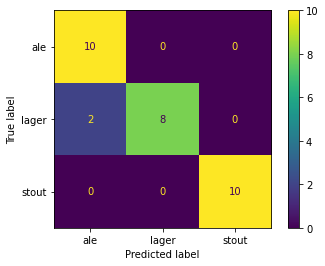

Classification Report: 
              precision    recall  f1-score   support

         ale       0.83      1.00      0.91        10
       lager       1.00      0.80      0.89        10
       stout       1.00      1.00      1.00        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [11]:
print("Train Accuracy:" + str("{:.4f}".format(accuracy_score(knn_y_train, knn_clf.predict(knn_X_train)))))
print("Test Accuracy:" +  str("{:.4f}".format(accuracy_score(knn_y_test, knn_y_pred))))
plot_confusion_matrix(knn_clf, knn_X_test, knn_y_test)
plt.show()
print("Classification Report: \n" + classification_report(knn_y_test, knn_y_pred))

### Cross-validation method for evaluating the model
#### https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
#### https://machinelearningmastery.com/k-fold-cross-validation/

In [12]:
knn_scores = cross_val_score(knn_clf, knn_X_train, knn_y_train, cv=10) 
print("Accuracy: %0.4f (+/- %0.4f)" % (knn_scores.mean(), knn_scores.std() * 2))

Accuracy: 0.9590 (+/- 0.1109)


## Step 5. Visualise the decision output

In [13]:
# Convert training target to numerical for visualisation purposes
knn_y_train = knn_y_train.astype('category')
knn_y_train = knn_y_train.cat.codes
#knn_y_train

In [14]:
# Convert training target to numerical for visualisation purposes
knn_y_test = knn_y_test.astype('category')
knn_y_test = knn_y_test.cat.codes
#knn_y_test

In [15]:
# Convert predicted target to numerical for visualisation purposes
knn_y_pred = pd.Series(knn_y_pred)
knn_y_pred = knn_y_pred.astype('category')
knn_y_pred = knn_y_pred.cat.codes

### Code taken and adapated from:
### https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508

In [16]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data, while this appears necessary in this function for visualisation, 
    # arbitrarily taking the first two features might not indicate which features had the most impact in the 
    # model classification
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = knn_clf # trained calssification model from previous step.
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

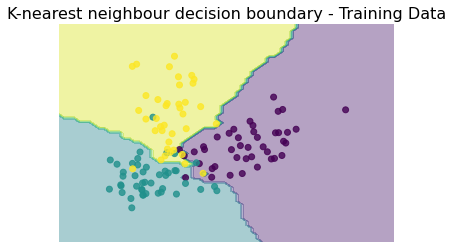

In [17]:
plt.figure()
plt.title("K-nearest neighbour decision boundary - Training Data",fontsize=16)
plot_decision_boundaries(knn_X_train, knn_y_train, plt)
# I turned off the axis display as the two features are arbitrary and do not inform
# the importance of the features to the model decision boundaries only the decision
# boundaries in the visualisation of the model
plt.axis('off')
plt.show()

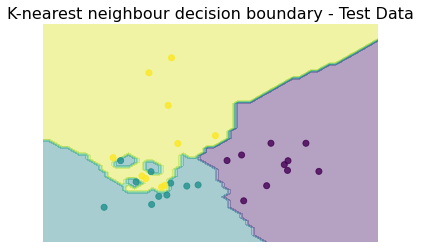

In [18]:
plt.figure()
plt.title("K-nearest neighbour decision boundary - Test Data",fontsize=16)
plot_decision_boundaries(knn_X_test, knn_y_test, plt)
plt.axis('off')
plt.show()

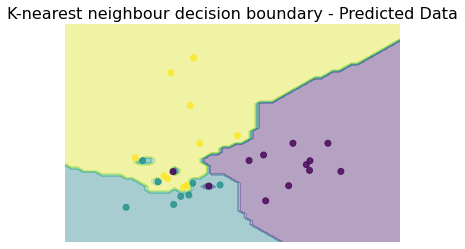

In [19]:
plt.figure()
plt.title("K-nearest neighbour decision boundary - Predicted Data",fontsize=16)
plot_decision_boundaries(knn_X_test, knn_y_pred, plt)
plt.axis('off')
plt.show()

## Using a method we have yet to study I am choosing the Support Vector Machine algorthim

## Step 3. Train the model

In [20]:
# Make a copy of the dataset for SVM model
svm_X_train = X_train
svm_y_train = y_train
svm_X_test = X_test
svm_y_test = y_test

### The SVM algorthim requires it's taget variables to be numerical as opposed to categorical type

In [21]:
# Convert target values in both train and test datasets to numerics
svm_y_train = svm_y_train.astype('category')
svm_y_train = svm_y_train.cat.codes

svm_y_test = svm_y_test.astype('category')
svm_y_test = svm_y_test.cat.codes

### As our data set is a multi-class classification problem, for the SVM model as per the scikit-learn documentation* we should choose a decision fucntion shape of one-v-one

### *https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [22]:
svm_clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
svm_clf.fit(X_train, svm_y_train)

svm_y_pred = svm_clf.predict(X_test)

## Step 4. Evaluate the model

Train Accuracy:0.9758
Test Accuracy:0.9667


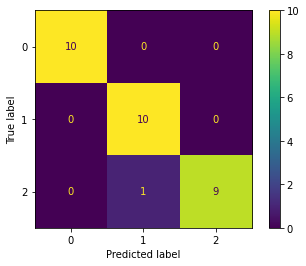

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [23]:
print("Train Accuracy:" + str("{:.4f}".format(accuracy_score(svm_y_train, svm_clf.predict(svm_X_train)))))
print("Test Accuracy:" +  str("{:.4f}".format(accuracy_score(svm_y_test, svm_y_pred))))
plot_confusion_matrix(svm_clf, svm_X_test, svm_y_test)
plt.show()
print("Classification Report: \n" + classification_report(svm_y_test, svm_y_pred))

### Cross-validation method for evaluating model

In [24]:
svm_scores = cross_val_score(svm_clf, svm_X_train, svm_y_train, cv=10) 
print("Accuracy: %0.4f (+/- %0.4f)" % (svm_scores.mean(), svm_scores.std() * 2))

Accuracy: 0.9590 (+/- 0.0821)


## Step 5. Visualise the decision output

### Visualing the SVM support vectors beyond 2 dimension has proved tricky. I found this solution online, that plots the IRIS dataset using PCA
#### https://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-classifier-in-an-svm-supervised-learning-model/

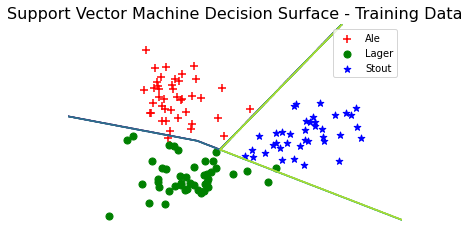

In [25]:
# Identifying the top 2 principal components in the data set
pca = PCA(n_components=2).fit(svm_X_train)
pca_2d = pca.transform(svm_X_train)
# fit the model created in the previous step to the calculated princpal components of the training data set and training target
svmClassifier_2d = svm_clf.fit(pca_2d, svm_y_train) 
for i in range(0, pca_2d.shape[0]):
    if svm_y_train[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', s=50, marker='+') # Ale
    elif svm_y_train[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='g', s=50, marker='o') # Lager
    elif svm_y_train[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', s=50, marker='*') # Stout

plt.legend([c1, c2, c3], ['Ale', 'Lager',   'Stout'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
plt.title('Support Vector Machine Decision Surface - Training Data', fontsize = 16)
plt.axis('off')
plt.show()

### Check if labels for targets are correct

In [26]:
print(sum(svm_y_train==0)) # 42
print(sum(svm_y_train==1)) # 44
print(sum(svm_y_train==2)) # 38
print(sum(y_train=='ale')) #42
print(sum(y_train=='lager')) # 44
print(sum(y_train=='stout')) # 48

42
44
38
42
44
38


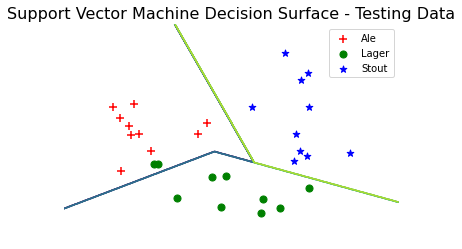

In [27]:
# Identifying the top 2 principal components in the data set
pca = PCA(n_components=2).fit(svm_X_test)
pca_2d = pca.transform(svm_X_test)
# fit the model created in the previous step to the calculated princpal components of the training data set and training target
svmClassifier_2d = svm_clf.fit(pca_2d, svm_y_test)
for i in range(0, pca_2d.shape[0]):
    if svm_y_test[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', s=50, marker='+') # Ale
    elif svm_y_test[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='g', s=50, marker='o') # Lager
    elif svm_y_test[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', s=50, marker='*') # Stout

plt.legend([c1, c2, c3], ['Ale', 'Lager',   'Stout'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
plt.title('Support Vector Machine Decision Surface - Testing Data', fontsize = 16)
plt.axis('off')
plt.show()

### Check if target labels are correct

In [28]:
print(sum(svm_y_test==0)) # 10
print(sum(svm_y_test==1)) # 10
print(sum(svm_y_test==2)) # 10
print(sum(y_test=='ale')) # 10
print(sum(y_test=='lager')) # 10
print(sum(y_test=='stout')) # 10

10
10
10
10
10
10


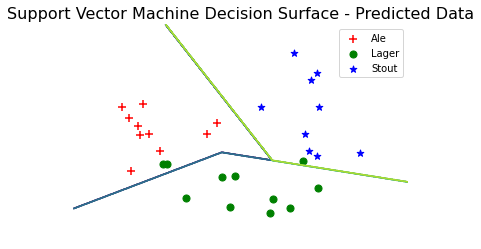

In [29]:
# Identifying the top 2 principal components in the data set
pca = PCA(n_components=2).fit(svm_X_test)
pca_2d = pca.transform(svm_X_test)
# fit the model created in the previous step to the calculated princpal components of the training data set and training target
svmClassifier_2d = svm_clf.fit(pca_2d, svm_y_pred) 
for i in range(0, pca_2d.shape[0]):
    if svm_y_pred[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', s=50, marker='+') # Ale
    elif svm_y_pred[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='g', s=50, marker='o') # Lager
    elif svm_y_pred[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', s=50, marker='*') # Stout

plt.legend([c1, c2, c3], ['Ale', 'Lager',   'Stout'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
plt.title('Support Vector Machine Decision Surface - Predicted Data', fontsize = 16)
plt.axis('off')
plt.show()

### Unlike the previous checks this step allows us to see in addition to the evaluation above where the model mis-calssified data

In [30]:
print(sum(svm_y_pred==0)) # 10
print(sum(svm_y_pred==1)) # 11
print(sum(svm_y_pred==2)) # 9
print(sum(y_test=='ale')) # 10
print(sum(y_test=='lager')) # 10
print(sum(y_test=='stout')) # 10

10
11
9
10
10
10
